Waly NGOM, Guillaume CANAT

# Projet SES722 : Partie 1, Régression

In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Description du jeu de données

In [25]:
with open("MROZ.txt") as f:
    content = f.read()
    print(content)

MROZ.DES

inlf      hours     kidslt6   kidsge6   age       educ      wage      repwage  
hushrs    husage    huseduc   huswage   faminc    mtr       motheduc  
fatheduc  unem      city      exper     nwifeinc  lwage     expersq   

  Obs:   753

  1. inlf                     =1 if in labor force, 1975
  2. hours                    hours worked, 1975
  3. kidslt6                  # kids < 6 years
  4. kidsge6                  # kids 6-18
  5. age                      woman's age in yrs
  6. educ                     years of schooling
  7. wage                     estimated wage from earns., hours
  8. repwage                  reported wage at interview in 1976
  9. hushrs                   hours worked by husband, 1975
 10. husage                   husband's age
 11. huseduc                  husband's years of schooling
 12. huswage                  husband's hourly wage, 1975
 13. faminc                   family income, 1975
 14. mtr                      fed. marginal tax rate facing 

## Question 1

In [63]:
# on utilise les noms de colonnes du fichier .DESC
col_names = ["inlf", "hours", "kidslt6", "kidsge6", "age", "educ", "wage",
             "repwage","hushrs","husage","huseduc", "huswage", "faminc",
             "mtr", "motheduc", "fatheduc", "unem", "city", "exper",
             "nwifeinc", "lwage", "expersq"]
# chargement des données
df = pd.read_csv("MROZ.csv", header=None, delim_whitespace=True, names=col_names)
df.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.354,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49


In [27]:
# on remplace les "." par des 0 et on convertit la colonne en type float
df.loc[:, "wage"] = df["wage"].replace({".":0.0}).astype(float)
# on filtre le dataframe comme demandé
df = df.loc[df["wage"] > 0, :]
df

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,1,680,0,5,36,10,2.3118,0.00,3430,43,...,19772,0.7215,7,7,7.5,0,2,18.199980,.8380265,4
424,1,2450,0,1,40,12,5.3061,6.50,2008,40,...,35641,0.6215,7,7,5.0,1,21,22.641060,1.668857,441
425,1,2144,0,2,43,13,5.8675,0.00,2140,43,...,34220,0.5815,7,7,7.5,1,22,21.640080,1.769429,484
426,1,1760,0,1,33,12,3.4091,3.21,3380,34,...,30000,0.5815,12,16,11.0,1,14,23.999980,1.226448,196


## Question 2

In [28]:
# stat descriptives pour les femmes (ie l'ensembe du dataset)
df[["wage", "age", "educ"]].describe()

,wage,age,educ
count,428.000000,428.000000,428.000000
mean,4.177682,41.971963,12.658879
std,3.310282,7.721084,2.285376
min,0.128200,30.000000,5.000000
25%,2.262600,35.000000,12.000000
50%,3.481900,42.000000,12.000000
75%,4.970750,47.250000,14.000000
max,25.000000,60.000000,17.000000


In [29]:
# stat descriptives pour les femmes dont le salaires du mari
# est supérieur au 65ème percentile de l'échantillon
percent_65 = np.percentile(df["huswage"], 65)
df.loc[df["huswage"] > percent_65, ["wage", "age", "educ"]].describe()

,wage,age,educ
count,148.000000,148.00000,148.000000
mean,5.139315,42.52027,13.520270
std,4.351728,7.35168,2.345845
min,0.213700,30.00000,5.000000
25%,2.561925,36.00000,12.000000
50%,4.008050,43.00000,13.000000
75%,6.516300,48.00000,16.000000
max,25.000000,59.00000,17.000000


In [30]:
# stat descriptives pour les femmes dont le salaires du mari
# est inférieur au 65ème percentile de l'échantillon
df.loc[df["huswage"] <= percent_65, ["wage", "age", "educ"]].describe()

,wage,age,educ
count,280.000000,280.000000,280.000000
mean,3.669390,41.682143,12.203571
std,2.458277,7.906875,2.119542
min,0.128200,30.000000,6.000000
25%,2.151600,35.000000,12.000000
50%,3.203550,41.000000,12.000000
75%,4.539500,47.000000,12.000000
max,22.500000,60.000000,17.000000


Le salaire moyen (et médian) des femmes dont les maris ont un salaire inférieur au 65ème percentile est inférieur aux autre femmes.

L'écart-type du salaire des femmes dont le mari à un salaire supérieur au 65ème percentile est plus important.

## Question 3

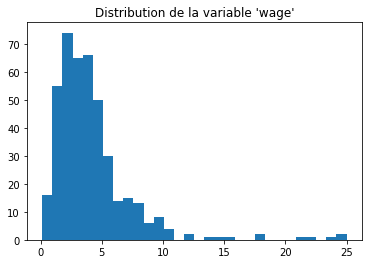

In [31]:
plt.figure(figsize=(6,4))
plt.hist(df["wage"], bins=30)
plt.title("Distribution de la variable 'wage'")
plt.show()

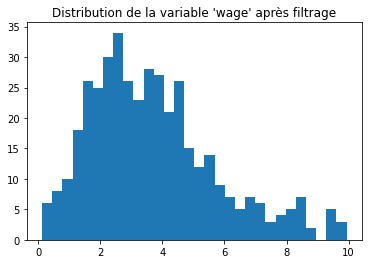

In [61]:
# mask booléen : valeur absolue de l'écart entre l'observation et la moyenne
# supérieur à 3 x l'écart-type
mask = np.abs(df["wage"] - df["wage"].mean()) <= 3*df["wage"].std()
# filtrage du dataframe avec ce mask
df = df.loc[mask,:]

# on refait l'histogramme
plt.figure(figsize=(6,4))
plt.hist(df.loc[:, "wage"], bins=30)
plt.title("Distribution de la variable 'wage' après filtrage")
plt.show()

## Question 4

In [33]:
correl = np.corrcoef(df["motheduc"], df["fatheduc"])[1,0]
print(f"Coéfficient de corrélation entre 'motheduc' et 'fatheduc' : {correl:.4f}")

Coéfficient de corrélation entre 'motheduc' et 'fatheduc' : 0.5487


Commentaire : Les deux variables sont moyennement corrélées.

Multi-colinéarité : si des variables sont colinéaires alors la matrice X n'est pas de plein rang et donc pas inversible. On aura donc pas de solution unique pour les paramètres du modèle.

## Question 5

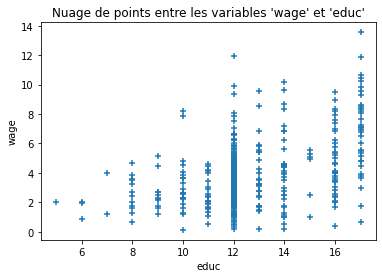

In [34]:
plt.figure(figsize=(6,4))
plt.scatter(df["educ"], df["wage"],  marker='+')
plt.title("Nuage de points entre les variables 'wage' et 'educ'")
plt.xlabel("educ")
plt.ylabel("wage")
plt.show()

Commentaire : Pour pouvoir extraire de l'information de ce type graphique, on doit en effet supposer *toute chose égale par ailleurs*, cependant on voit bien que ça n'est pas le cas ici puisque pour une valeur d'*educ* on peut avoir de nombreuses valeurs de *wage* très disparates (comme par exemple pour *educ* = 12).

## Question 6
Hypothèse fondamentale pour le modèle $y_i = \theta^T X_i + \epsilon_i$ :
* $\forall i \text{, } \mathbb{E}[\epsilon_i] = 0$ et $\epsilon_i$ indépendants.
* $X$ est de plein rang (à voir si on garde)

**Compléter biais de variable omise**

## Question 7

In [35]:
X = df[["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]]
X = sm.add_constant(X)
y = np.log(df["wage"])
model = sm.OLS(y,X).fit()

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     14.41
Date:                Tue, 03 May 2022   Prob (F-statistic):           6.13e-15
Time:                        11:45:56   Log-Likelihood:                -392.18
No. Observations:                 419   AIC:                             798.4
Df Residuals:                     412   BIC:                             826.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4379      0.195     -2.243      0.025      -0.822      -0.054
city           0.0236      0.066      0.359      0.720      -0.106       0.153
educ           0.0993      0.014      6.991      0.000       0.071       0.127
exper          0.0189      0.004      4.493      0.000       0.011       0.027
nwifeinc       0.0043      0.003      1.376      0.170      -0.002       0.010
kidslt6       -0.0613      0.080     -0.764      0.445      -0.219       0.096
kidsge6       -0.0002      0.025     -0.009      0.993      -0.050       0.049
==============================================================================
Omnibus:                      124.505   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.383
Skew:                          -1.361   Prob(JB):                     1.03e-85
Kurtosis:                       6.874   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

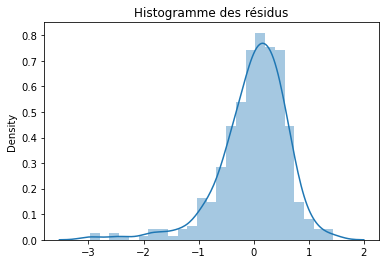

In [37]:
plt.figure(figsize=(6,4))
sns.distplot(model.resid)
plt.title("Histogramme des résidus")
plt.show()

Commentaire : la distribution des résidus a une forme quasi-gaussienne bien que l'on note une légère disymmétrie (skewness) et "longue queue" à gauche (kurtosis).

## Question 8
Test de student pour le $k$-ième coéfficient de regression $\beta_k$ :

 - estimateur de $\sigma^2$ : $\hat{\sigma}^2 = \frac{1}{n-p-1}\|Y - X \beta\|^2$, avec $n$ le nombre d'observations et $p+1$ le rang de $X$ (constante inclue),

 - $\hat{s}_k^2$ = $n (X^TX)^{-1}_{k,k}$ , le $k$-ième élément de la diagonale

 - alors
$$T = \sqrt \frac{n}{\hat{s}_k^2 \hat{\sigma}^2_{k}}(\hat{\beta}_{k} - \beta^{*}_{k}) \sim \mathcal{T}_{n-p-1}$$

Hypothèse nulle : $\beta^{*}_{k}=0$. On a donc la statistique de test suivante :
$$T = \sqrt \frac{n}{\hat{s}_k^2 \hat{\sigma}^2_{k}}\hat{\beta}_{k} \sim \mathcal{T}_{n-p-1}$$

In [38]:
from scipy.stats import t

def calc_stat(X, y, col_name, h0):
    """
    Calcul de la statistique de Student pour le coéfficient de régression correspondant
    à la variable `col_name` avec hypothèse nulle : coéfficient = `h0`.
    """
    # on fit le modèle
    model = sm.OLS(y, X).fit()
    # on récupère le numéro de colonne qui nous intéresse
    col_number = np.where(col_name == X.columns)[0]
    n, p = X.shape
    # sigma chapeau
    sig2 = model.resid @ model.resid / (n-p)
    # s chapeau
    s_hat = np.diag(np.linalg.inv(X.T @ X) * n)[col_number]
    # stat de student
    T_stat = float(np.sqrt(n/(s_hat*sig2)) * (model.params[col_name] - h0))
    p_val = t.sf(np.abs(T_stat), X.shape[0] - X.shape[1])*2
    print(f"T-Stat: {T_stat:.3f}, p-value: {p_val:.2e}")
    return T_stat, p_val

In [39]:
def test_stat(T_stat, q, X):
    """
    Test de Student avec niveau de confiance `q`
    """
    n, p = X.shape
    n, p = X.shape
    perc = t.ppf(q, n-p)
    seuil = (1-q)*2
    if perc < np.abs(T_stat):
        print(f"Avec seuil de significativité de {seuil*100:.2f}%, on rejette H0")
    else:
        print(f"Avec seuil de significativité de {seuil*100:.2f}%, on ne rejette pas H0")

In [40]:
T_stat, p_val = calc_stat(X, y, "nwifeinc", 0)
test_stat(T_stat, 0.995, X)
test_stat(T_stat, 0.975, X)
test_stat(T_stat, 0.95, X)
test_stat(T_stat, 1-p_val/2, X)

T-Stat: 1.376, p-value: 1.70e-01
Avec seuil de significativité de 1.00%, on ne rejette pas H0
Avec seuil de significativité de 5.00%, on ne rejette pas H0
Avec seuil de significativité de 10.00%, on ne rejette pas H0
Avec seuil de significativité de 16.96%, on rejette H0


La p-valeur est le plus petit seuil à partir duquel on peut rejeter H0

## Question 9

In [41]:
# stat de student
T_stat, p_val = calc_stat(X, y, "nwifeinc", 0.01)
test_stat(T_stat, 0.975, X)

T-Stat: -1.816, p-value: 7.01e-02
Avec seuil de significativité de 5.00%, on ne rejette pas H0


## Question 10
On pose $y$ = wage et $X$ = (constante, city, educ, exper, nwifeinc, kidslt6, kidsge6), ie $X_0$ = constante, $X_1$ = city, ... , $X_6$ = kidsge6.

On a donc le modèle $\hat{y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \beta_5 X_5 + \beta_6 X_6$.

On veut tester l'hypothèse $H_0:\{ \beta_4 = 0.01 , \beta_1 = 0.05\} \iff \{ \theta = \beta_4 - 0.01 = 0, \theta' = \beta_1 - 0.05 = 0 \}$. On réécrit le modèle ainsi :
$$
\hat{y} - 0.01 X_4 - 0.05 X_2 = \beta_0 + \theta' X_1 + \beta_2 X_2 + \beta_3 X_3 + \theta X_4 + \beta_5 X_5 + \beta_6 X_6
$$

In [42]:
from scipy.stats import f

def calc_ssr(X, y):
    """
    Caclul de la somme des résidus au carré
    """
    model = sm.OLS(y, X).fit()
    u = model.resid
    SSR = u.T @ u
    return SSR

def calc_fisher(SSR0, SSR1, c, ddl):
    """
    Calcul de la statistique de Fisher avec `c` nombre de contraintes
    et `ddl` nombre de degrés de liberté du modèle non contraint
    """
    F = ((SSR1 - SSR0)/c) / (SSR0/ddl)
    p_val = f.sf(F, c, ddl)
    print(f"F-stat : {F:.3f}, p-value : {p_val:.2e}")
    return F, p_val

def fisher_test(X, y, constrained_cols, q):
    """
    Test de Fisher avec contrainte sur les variables `constrained_cols`
    et niveau de confiance `q`.
    """
    n, p = X.shape
    # on calcule la somme des carrés des résidus du modèle non contraint
    SSR0 = calc_ssr(X, y)
    # colonnes du modèle contraint
    new_cols = list(set(X.columns) - set(constrained_cols))
    # modèle contraint
    X1 = X.loc[:, new_cols]
    SSR1 = calc_ssr(X1, y)
    c = len(constrained_cols) # nombre de contraintes
    ddl = n - p # dégrés de liberté
    # Stat de Fisher
    F, p_val = calc_fisher(SSR0, SSR1, c, ddl)
    perc = f.ppf(q, c, ddl)
    if perc < F:
        print(f"Avec seuil de significativité de {(1-q)*100:.2f}%, on rejette H0")
    else:
        print(f"Avec seuil de significativité de {(1-q)*100:.2f}%, on ne rejette pas H0")

In [43]:
#df.loc[:,"nwifeinc_city"] = 0.01 * df["nwifeinc"] + 0.05 * df["city"]
X = df[["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]]
X = sm.add_constant(X)
y = np.log(df["wage"]) - 0.01 * df["nwifeinc"] - 0.05 * df["city"]
model = sm.OLS(y, X).fit()

fisher_test(X, y, ["city", "nwifeinc"], 0.95)

F-stat : 1.983, p-value : 1.39e-01
Avec seuil de significativité de 5.00%, on ne rejette pas H0


In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     14.41
Date:                Wed, 04 May 2022   Prob (F-statistic):           6.13e-15
Time:                        13:50:02   Log-Likelihood:                -392.18
No. Observations:                 419   AIC:                             798.4
Df Residuals:                     412   BIC:                             826.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4379      0.195     -2.243      0.025      -0.822      -0.054
city           0.0236      0.066      0.359      0.720      -0.106       0.153
educ           0.0993      0.014      6.991      0.000       0.071       0.127
exper          0.0189      0.004      4.493      0.000       0.011       0.027
nwifeinc       0.0043      0.003      1.376      0.170      -0.002       0.010
kidslt6       -0.0613      0.080     -0.764      0.445      -0.219       0.096
kidsge6       -0.0002      0.025     -0.009      0.993      -0.050       0.049
==============================================================================
Omnibus:                      124.505   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.383
Skew:                          -1.361   Prob(JB):                     1.03e-85
Kurtosis:                       6.874   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Question 11



On veut tester l'hypothèse jointe $\beta_1 + \beta_4 = 0.1$ et $\beta_2 + \beta_3 = 0.1$.
On peut écrire :
$$
\theta_1 = \beta_1 + \beta_4 - 0.1 = 0 \mbox{ et } \theta_2 = \beta_2 + \beta_3 - 0.1 = 0
$$
$$
\iff
$$
$$ \beta_1 = \theta_1 - \beta_4 + 0.1 \mbox{ et } \beta_2 = \theta_2 - \beta_3 + 0.1 $$

On réécrit ainsi le modèle:
$$
\hat{y} - 0.1 X_1 - 0.1 X_2 = \beta_0 + \theta_1 X_1 +  \theta_2 X_2 + \beta_3 (X_3 - X_2) + \beta_4 (X_4 - X_1) + \beta_5 X_5 + \beta_6 X_6
$$

Et on réalise un test de Fisher sur $H_0$ : \{ $\theta_1 = 0 \mbox{ et } \theta_2 = 0 \}$


In [45]:
y = np.log(df["wage"]) - 0.1 * df["city"] - 0.1 * df["educ"]

df.loc[:, "newvar1"] = df["exper"] - df["educ"]
df.loc[:, "newvar2"] = df["nwifeinc"] - df["city"]

X = df[["city", "educ", "newvar1", "newvar2", "kidslt6", "kidsge6"]]
X = sm.add_constant(X)

fisher_test(X, y, ["city", "educ"], 0.95)

F-stat : 1.257, p-value : 2.86e-01
Avec seuil de significativité de 5.00%, on ne rejette pas H0


## Question 12

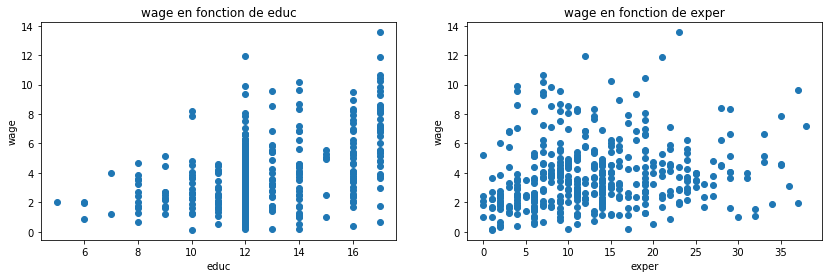

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
axes[0].scatter(df["educ"], df["wage"])
axes[0].set_xlabel("educ")
axes[0].set_ylabel("wage")
axes[0].set_title("wage en fonction de educ")
axes[1].scatter(df["exper"], df["wage"])
axes[1].set_xlabel("exper")
axes[1].set_ylabel("wage")
axes[1].set_title("wage en fonction de exper")
plt.show()

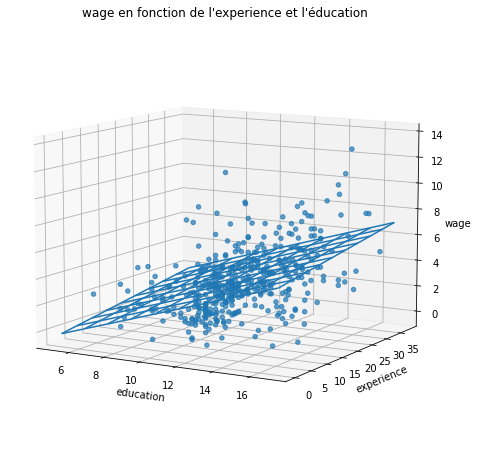

In [47]:
X = df[["educ", "exper"]]
X = sm.add_constant(X)
y = df["wage"]
model = sm.OLS(y, X)
results = model.fit()

xx = np.linspace(df["educ"].min(), df["educ"].max(),10)
yy = np.linspace(df["exper"].min(), df["exper"].max(),10)
xx, yy = np.meshgrid(xx, yy)

exog = np.column_stack((xx.ravel(), yy.ravel()))
exog = sm.add_constant(exog)

zz = model.predict(params=results.params, exog=exog).reshape(xx.shape)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
#ax.plot_surface(xx, yy, zz, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.plot_wireframe(xx,yy,zz)
ax.scatter(df["educ"], df["exper"], df["wage"], alpha=0.7)
ax.set_xlabel('education')
ax.set_ylabel('experience')
ax.set_zlabel('wage')
ax.view_init(10, -60)
ax.set_title("wage en fonction de l'experience et l'éducation")
plt.show()


In [48]:
print(f"Coéfficients de regression :\n{results.params}")

Coéfficients de regression :
const   -2.396575
educ     0.439993
exper    0.050970
dtype: float64


On peut remarquer que le coéfficient de l'hyperplan de regression est plus important sur l'axe *educ* que sur l'axe *exper*.

## Question 13
En reprenant les notations de la question 11, on veut tester  $H_0 : \beta_5 = \beta_6 \iff \theta = \beta_5 - \beta_6 = 0$. On peut donc réécrire le modèle avec $\beta_5 = \theta + \beta_6$.

On a donc :
$$
\hat{y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + (\theta + \beta_6) X_5 + \beta_6 X_6 \\
\iff \\
\hat{y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \theta X_5 + \beta_6 (X_5 + X_6)
$$

In [49]:
y = np.log(df["wage"])
df.loc[:, "newvar1"] = df["kidsge6"] + df["kidslt6"]
X = df[["city", "educ", "exper", "nwifeinc", "kidslt6", "newvar1"]]
X = sm.add_constant(X)

T_stat, p_val = calc_stat(X, y, "kidslt6", 0)
test_stat(T_stat, 0.975, X)

T-Stat: -0.720, p-value: 4.72e-01
Avec seuil de significativité de 5.00%, on ne rejette pas H0


Interpretation **??**

## Question 14

In [50]:
X = df[["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]]
X = sm.add_constant(X)
y = np.log(df["wage"])
model = sm.OLS(y, X).fit()
# résidus au carré
u2 = model.resid ** 2
# test de fisher avec comme nouvelle target 'u2' et modèle contraint
# conservant uniquement la constante
fisher_test(X, u2, ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"], 0.95)

F-stat : 1.413, p-value : 2.08e-01
Avec seuil de significativité de 5.00%, on ne rejette pas H0


On ne peut donc pas rejeter l'hypothèse d'homoscédasticité. La p-valeur étant de 0.208, il faudrait accépter un taux d'erreur de plus de 20% pour rejeter l'hypothèse nulle.

## Question 15

In [51]:
cols = ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]
# on divise le dataset en 2 pour appliquer la méthode simple
mask = df["age"] >= 43
df1 = df.loc[mask, cols]
df2 = df.loc[~mask, cols]
y1 = np.log(df.loc[mask, "wage"])
y2 = np.log(df.loc[~mask, "wage"])
X1 = sm.add_constant(df1)
X2 = sm.add_constant(df2)

# on calcule les SSR pour les 2 datasets ainsi créés
SSR01 = calc_ssr(X1,y1)
SSR02 = calc_ssr(X2, y2)
SSR0 = SSR01 + SSR02

# modèle contraint
X = df.loc[:, cols]
X = sm.add_constant(X)
SSR1 = calc_ssr(X, y)

c = X1.shape[1]
ddl = X.shape[0] - c*2

F, p_val = calc_fisher(SSR0, SSR1, c, ddl)

F-stat : 1.084, p-value : 3.72e-01


On ne rejette pas l'hypothèse de non significativité des variables binaires. Donc a priori pas de changement de structure.

## Question 16

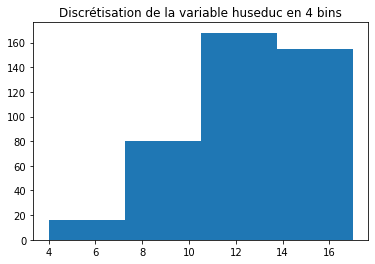

In [52]:
plt.figure(figsize=(6,4))
plt.hist(df["huseduc"], bins=4)
plt.title("Discrétisation de la variable huseduc en 4 bins")
plt.show()

# 4 bins uniformément répartis sur l'espace des valeurs prises par `huseduc`
df.loc[:, "huseduc_cat"] = pd.cut(df["huseduc"], bins=4, labels=[f"huseduc_{i}" for i in range(4)])
# 4 bins équilibrées, ie contenant à peu près le même nombre d'observations
df.loc[:, "huseduc_qcat"] = pd.qcut(df["huseduc"], q=4, labels=[f"huseduc_q{i}" for i in range(4)])

In [58]:
df["huseduc_qcat"]

0      huseduc_q1
1      huseduc_q0
2      huseduc_q1
3      huseduc_q0
4      huseduc_q1
          ...    
423    huseduc_q1
424    huseduc_q0
425    huseduc_q0
426    huseduc_q1
427    huseduc_q0
Name: huseduc_qcat, Length: 419, dtype: category
Categories (4, object): ['huseduc_q0' < 'huseduc_q1' < 'huseduc_q2' < 'huseduc_q3']

In [53]:
# On teste avec les bins uniformes
X = pd.concat((df.loc[:, cols], pd.get_dummies(df["huseduc_cat"])), axis=1)
X = sm.add_constant(X)
y = np.log(df["wage"])
fisher_test(X, y, ["huseduc_0","huseduc_1","huseduc_2", "huseduc_3"], 0.95)

F-stat : 0.522, p-value : 7.20e-01
Avec seuil de significativité de 5.00%, on ne rejette pas H0


In [31]:
# on teste avec les bins équilibrés
X = pd.concat((df.loc[:, cols], pd.get_dummies(df["huseduc_qcat"])), axis=1)
X = sm.add_constant(X)
y = np.log(df["wage"])
fisher_test(X, y, ["huseduc_q0","huseduc_q1","huseduc_q2", "huseduc_q3"], 0.95)

F-stat : 0.990, p-value : 4.13e-01
Avec seuil de significativité de 5.00%, on ne rejette pas H0


Dans les deux cas on ne peut pas rejeter l'hypothèse de non significativité des variables binaires.

# Partie 2

## Question 1

In [32]:
df = pd.read_excel("quarterly.xls")
df

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2011Q4,0.07,0.01,0.11,0.95,2.05,200.77,192.97,226.97,112.50,2165.77,28787.3,9599.47,8.67,95.33,13441.0,14255.9,113.987,1055.496
208,2012Q1,0.10,0.07,0.16,0.90,2.04,202.17,193.73,228.27,113.12,2213.97,29238.6,9777.03,8.27,96.70,13506.4,14317.4,114.599,1082.519
209,2012Q2,0.15,0.09,0.19,0.79,1.82,201.80,192.83,228.84,113.60,2258.30,29611.6,9888.97,8.17,97.27,13548.5,14379.3,115.035,1104.500
210,2012Q3,0.14,0.10,0.18,0.67,1.64,202.40,195.20,230.03,113.91,2326.47,30251.4,10029.87,8.03,97.39,13652.5,14441.9,115.810,1119.187


## Question 2

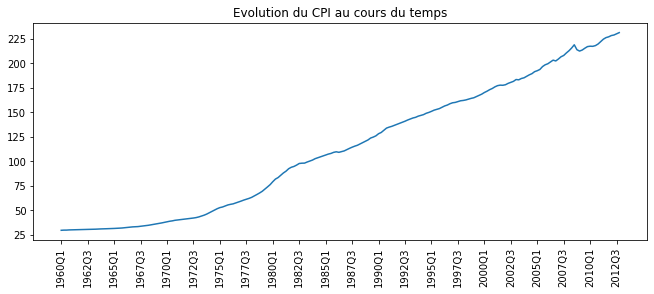

In [33]:
plt.figure(figsize=(11,4))
plt.plot(df["DATE"], df["CPI"])
plt.xticks([x for i, x in enumerate(df["DATE"]) if i%10==0], rotation=90)
plt.title("Evolution du CPI au cours du temps")
plt.show()

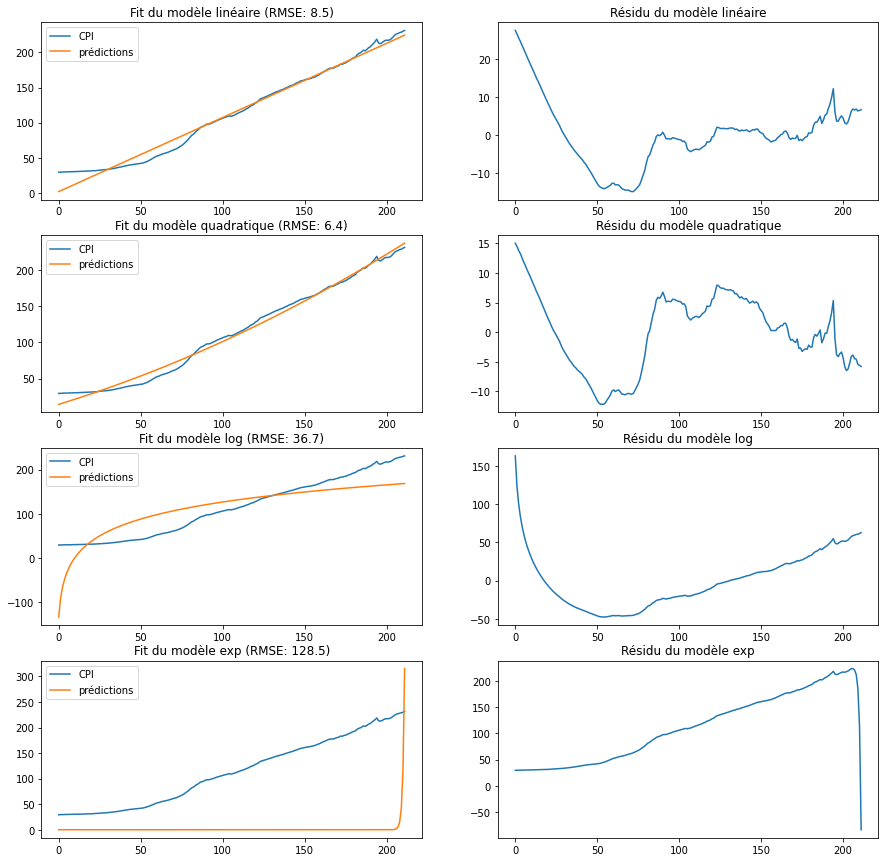

In [34]:
from sklearn.metrics import mean_squared_error

X = np.arange(1, len(df)+1)
y = df["CPI"]
func_type = ["linéaire", "quadratique", "log", "exp"]
X_list = [X, np.column_stack((X, X**2)), np.log(X), np.exp(X)]

fig, axes = plt.subplots(len(func_type), 2, figsize=(15, 15))
all_preds = []

for i, X in enumerate(X_list):
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    preds = model.predict(results.params)
    all_preds.append(preds)
    rmse = np.sqrt(mean_squared_error(y, preds))
    axes[i, 0].plot(y, label="CPI")
    axes[i, 0].plot(preds, label="prédictions")
    axes[i, 0].set_title(f"Fit du modèle {func_type[i]} (RMSE: {rmse:.1f})")
    axes[i, 0].legend()
    axes[i, 1].plot(results.resid)
    axes[i, 1].set_title(f"Résidu du modèle {func_type[i]}")

plt.show()

La méthode de regression avec la tendance quadratique semble la mieux adaptée (RMSE plus petite).

## Question 3

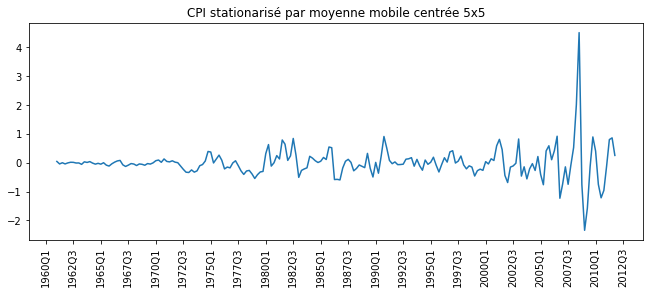

In [35]:
weights = np.array([1/25, 2/25, 3/25, 4/25, 5/25, 4/25, 3/25, 2/25, 1/25])
df.loc[:, "CPI_rollmean"] = df["CPI"].rolling(9, center=True).apply(lambda x: np.sum(weights*x))

plt.figure(figsize=(11,4))
plt.plot(df["DATE"], df["CPI"] - df["CPI_rollmean"])
plt.xticks([x for i, x in enumerate(df["DATE"]) if i%10==0], rotation=90)
plt.title("CPI stationarisé par moyenne mobile centrée 5x5")
plt.show()

## Question 4

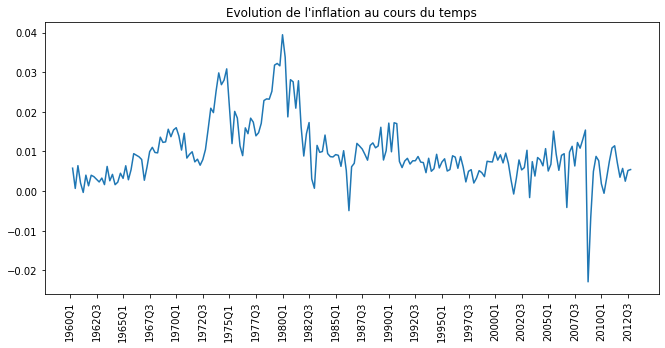

In [36]:
df.loc[:, "inf"] = df["CPI"] / df["CPI"].shift(1) - 1
plt.figure(figsize=(11, 5))
plt.plot(df["DATE"], df["inf"])
plt.title("Evolution de l'inflation au cours du temps")
plt.xticks([x for i, x in enumerate(df["DATE"]) if i%10==0], rotation=90)
plt.show()

Commentaire : taux d'inflation avait tendance à augmenter jusqu'au premier choc pétrolier de 79. Depuis la tendance est à la baisse.

## Question 5

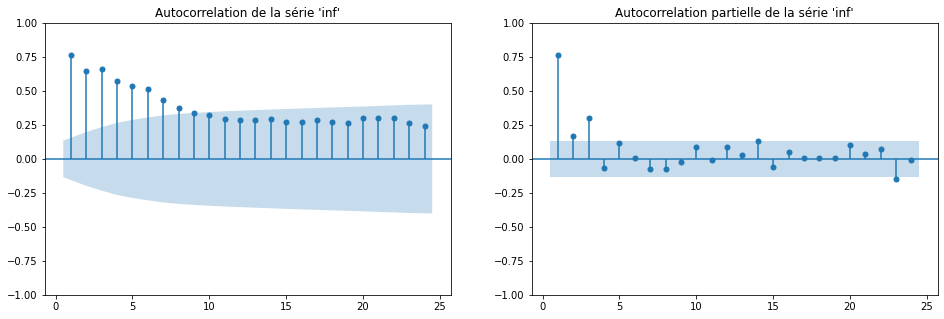

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

inf = df["inf"].dropna()
fig, axes = plt.subplots(1, 2, figsize=(16,5))
plot_acf(inf, ax=axes[0], zero=False, title="Autocorrelation de la série 'inf'")
plot_pacf(inf, ax=axes[1], zero=False, title="Autocorrelation partielle de la série 'inf'")
plt.show()

* Autocorrelation d'ordre $h$ : $\rho(h) = \frac{\gamma(h)}{\gamma(0)}$ avec $\gamma(h) = \text{cov}(Y_t, Y_{t+h})$
* Autocorrelations partielles = coéfficients de la regression linéaire sur les lags considérés (ici 25) pour prédire la valeur au temp $t$.

## Question 6

* Stationarité stricte : la distribution jointe de $(Y_{t+1}, Y_{t+2},\cdots, Y_{t+h})$ ne dépend pas de $h$, ie le passé et le futur se ressemblent.
* Stationarité faible : $\forall t, \mathbb{E}[Y_t] = \mu$ et $\forall t, \forall h, \text{cov}(Y_t, Y_{t+h}) = \gamma(h)$
* Ergodicité : $\underset{h \rightarrow \infty}{\lim} \rho(h) = 0$, ie le processus oublie les conditions initiales

Ces deux conditions sont nécessaires car elles permettent, pour la première, d'appliquer le Théorème Central Limite et pour la seconde, de faire correspondre la moyenne temporelle et la moyenne spatiale (Théorème ergodique) et ainsi analyser le processus en analysant une seule trajectoire.

*Spurious Regresion* : corrélation n'est pas causation

## Question 7

In [38]:
from statsmodels.tsa.stattools import adfuller

adf_results = adfuller(inf, autolag="AIC")

print(f"ADF Stat : {adf_results[0]:.3f}, p-value : {adf_results[1]:.3e}")
print(f"Nombre de lags utilisés : {adf_results[2]}")
print("Valeurs critiques :")
for k, v in adf_results[4].items():
    print(f"    [{k} : {v:.4f}]")

ADF Stat : -2.919, p-value : 4.318e-02
Nombre de lags utilisés : 2
Valeurs critiques :
    [1% : -3.4622]
    [5% : -2.8755]
    [10% : -2.5742]


La p-value est inférieure à 5%, on peut donc rejeter l'hypothèse nulle qui est que la série n'est pas stationaire. La série est donc stationaire.

In [39]:
adf_results = adfuller(df["CPI"], regression="ctt", autolag="AIC")

print(f"ADF Stat : {adf_results[0]:.3f}, p-value : {adf_results[1]:.3e}")
print(f"Nombre de lags utilisés : {adf_results[2]}")
print("Valeurs critiques :")
for k, v in adf_results[4].items():
    print(f"    [{k} : {v:.4f}]")

ADF Stat : -2.550, p-value : 5.408e-01
Nombre de lags utilisés : 5
Valeurs critiques :
    [1% : -4.4283]
    [5% : -3.8614]
    [10% : -3.5712]


## Question 8

In [40]:
from pmdarima import ARIMA

# modèle ARIMA(p,0,0) = AR(p)
ar = ARIMA((2,0,0))

ar.fit(df["inf"])
preds = ar.predict_in_sample()

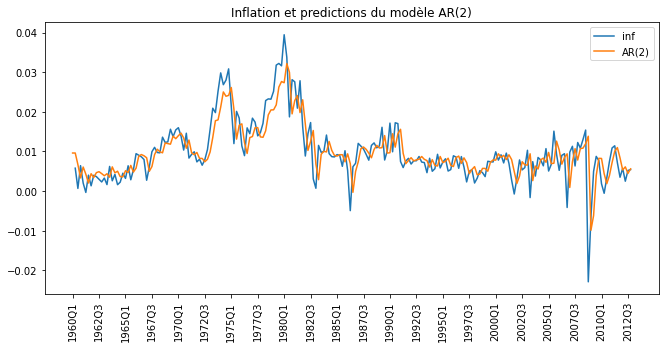

In [41]:
plt.figure(figsize=(11, 5))
plt.plot(df["DATE"], df["inf"], label="inf")
plt.plot(df["DATE"], preds, label="AR(2)")
plt.title("Inflation et predictions du modèle AR(2)")
plt.legend()
plt.xticks([x for i, x in enumerate(df["DATE"]) if i%10==0], rotation=90)
plt.show()

## Question 9

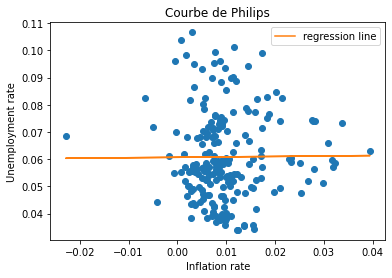

In [42]:
# on passe la variable `Unemp` à la même échelle que `inf`
df.loc[:, "Unemp"] = df["Unemp"] / 100
X9 = inf
y9 = df["Unemp"].iloc[1:]
X9 = sm.add_constant(X9)
model9 = sm.OLS(y9, X9)
results9 = model9.fit()
preds = model9.predict(results9.params, X9)

plt.figure(figsize=(6,4))
plt.scatter(inf, y9)
plt.plot(inf, preds, color="C1", label="regression line")
plt.title("Courbe de Philips")
plt.xlabel("Inflation rate")
plt.ylabel("Unemployment rate")
plt.legend()
plt.show()

## Question 10
Pour tester l'autocorrélation des erreurs, on définit le modèle autorégressif suivant : $u_t = \rho u_{t-1} + \epsilon$ où $u_t$ est le résidu au temps $t$.

On teste l'hypothèse $H_0 : \rho = 0$ avec un test de Student.

In [43]:
u = results9.resid.iloc[1:]
X10 = results9.resid.shift(1).iloc[1:]

model10 = sm.OLS(u, X10)
results10 = model10.fit()
results10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              4557.
Date:                Fri, 29 Apr 2022   Prob (F-statistic):                   6.88e-144
Time:                        00:17:50   Log-Likelihood:                          896.68
No. Observations:                 210   AIC:                                     -1791.
Df Residuals:                     209   BIC:                                     -1788.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9799      0.015     67.507      0.000       0.951       1.009
==============================================================================
Omnibus:                       78.916   Durbin-Watson:                   0.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.932
Skew:                           1.583   Prob(JB):                     6.51e-54
Kurtosis:                       7.239   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comme indiqué dans le résumé du modèle OLS de *statsmodels*, la p-valeur du test de Student pour le coéfficient du modèle est 0.000 donc on peut rejeter l'hypothèse nulle à 1%. Les erreurs sont autocorrélées.

## Question 11
Pour corriger l'autocorrélation, on transforme le modèle comme suit : $y_t - \rho y_{t-1} = \beta_0 + \beta_1 (X_t - \rho X_{t-1})$

In [44]:
rho = results10.params[0]
y11 = df["Unemp"] - rho * df["Unemp"].shift(1)
y11 = y11.iloc[2:]
X11 = df["inf"] - rho * df["inf"].shift(1)
X11 = X11.iloc[2:]
X11 = sm.add_constant(X11)

model11 = sm.OLS(y11, X11)
results11 = model11.fit()
results11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Unemp   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.203
Date:                Fri, 29 Apr 2022   Prob (F-statistic):             0.0236
Time:                        00:17:50   Log-Likelihood:                 900.29
No. Observations:                 210   AIC:                            -1797.
Df Residuals:                     208   BIC:                            -1790.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.000      5.909      0.000       0.001       0.002
inf           -0.0996      0.044     -2.281      0.024      -0.186      -0.014
==============================================================================
Omnibus:                       82.044   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.535
Skew:                           1.600   Prob(JB):                     2.70e-62
Kurtosis:                       7.707   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Question 12
Il s'agit de réaliser un Test de Chow:
* Modèle contraint : régression sur l'ensemble de la période -> $SSR1$
* 2 modèles non-contraints : régressions sur les sous-périodes -> $SSR0_{total} = SSR0_1 + SSR0_2$.

* L'hypothèse nulle $H_0$ est que les coéfficients de régression des 3 modèles sont les mêmes.

* On calcul la statistique de Fisher : $F = \frac{(SSR0_{total} - SSR1) / c}{ SSR0_{total} / ddl}$
avec $ddl = n-2(p+1)$ et restrictions : $c = p + 1$.



In [45]:
def chow_test(X, y):
    # modèle contraint
    model1 = sm.OLS(y, X).fit()
    SSR1 = model1.resid.T @ model1.resid
    # point de split du dataset en 2 parts égales
    split_point = X.shape[0] // 2
    X1 = X.iloc[:split_point]
    y1 = y.iloc[:split_point]
    X2 = X.iloc[split_point:]
    y2 = y.iloc[split_point:]
    # résidus des 2 sous-modèles non-contraints 
    SSR0_1 = calc_ssr(X1, y1)
    SSR0_2 = calc_ssr(X2, y2)
    # nombre de restrictions:
    c = X.shape[1]
    ddl = X.shape[0] - 2 * c
    # stat de Fisher et p-value
    F, p_val = calc_fisher(SSR0_1+SSR0_2, SSR1, c, ddl)
    if p_val < 0.05:
        print("On rejette l'hypothèse de stabilité de la relation chômage-inflation à 5%")
    else:
        print("On ne rejette par l'hypothèse nulle à 5%")
    return F, p_val

In [46]:
# en repartant du modèle de la question 11
_ = chow_test(X11, y11)

F-stat : 4.478, p-value : 1.25e-02
On rejette l'hypothèse de stabilité de la relation chômage-inflation à 5%


In [47]:
# en repartant du modèle de la question 9
_ = chow_test(X9, y9)

F-stat : 1.942, p-value : 1.46e-01
On ne rejette par l'hypothèse nulle à 5%


## Question 13

In [48]:
X13 = df[["inf", "Unemp"]]
X13 = pd.concat([X13.shift(i) for i in range(1,5)], axis=1).iloc[5:]
cols = []
for i in range(1,5):
    cols.append(f"inf_{i}")
    cols.append(f"Unemp_{i}")
X13.columns = cols
X13 = sm.add_constant(X13)

y13 = df["Unemp"].iloc[5:]

X13

,const,inf_1,Unemp_1,inf_2,Unemp_2,inf_3,Unemp_3,inf_4,Unemp_4
5,1.0,0.002015,0.0680,0.006421,0.0627,0.000676,0.0553,0.005782,0.0523
6,1.0,-0.000335,0.0700,0.002015,0.0680,0.006421,0.0627,0.000676,0.0553
7,1.0,0.004023,0.0677,-0.000335,0.0700,0.002015,0.0680,0.006421,0.0627
8,1.0,0.001336,0.0620,0.004023,0.0677,-0.000335,0.0700,0.002015,0.0680
9,1.0,0.004001,0.0563,0.001336,0.0620,0.004023,0.0677,-0.000335,0.0700
...,...,...,...,...,...,...,...,...,...
207,1.0,0.007169,0.0900,0.011440,0.0903,0.010881,0.0900,0.007477,0.0953
208,1.0,0.003493,0.0867,0.007169,0.0900,0.011440,0.0903,0.010881,0.0900
209,1.0,0.005728,0.0827,0.003493,0.0867,0.007169,0.0900,0.011440,0.0903
210,1.0,0.002497,0.0817,0.005728,0.0827,0.003493,0.0867,0.007169,0.0900


Coéfficients de régression:
 const      0.001457
inf_1      0.031105
Unemp_1    1.593705
inf_2     -0.023578
Unemp_2   -0.647169
inf_3      0.068949
Unemp_3    0.022248
inf_4      0.016329
Unemp_4   -0.007975
dtype: float64


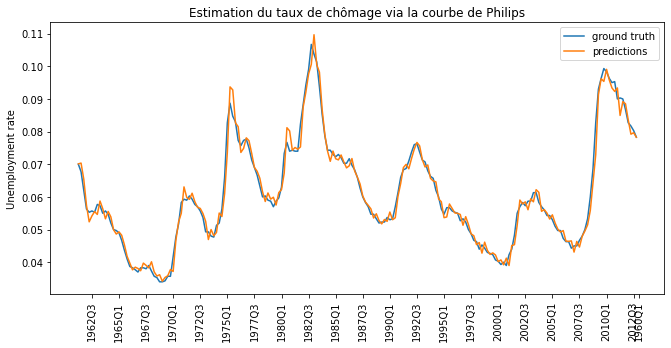

In [49]:
model13 = sm.OLS(y13, X13)
results13 = model13.fit()
preds = model13.predict(results13.params, X13)
print("Coéfficients de régression:\n",results13.params)

plt.figure(figsize=(11,5))
plt.plot(df["DATE"].iloc[5:], y13, label="ground truth")
plt.plot(df["DATE"].iloc[5:], preds, color="C1", label="predictions")
plt.title("Estimation du taux de chômage via la courbe de Philips")
#plt.xlabel("")
plt.ylabel("Unemployment rate")
plt.xticks([x for i, x in enumerate(df["DATE"]) if i%10==0], rotation=90)
plt.legend()
plt.show()

On réalise le test de Granger. Il s'agit d'un test de Fisher avec pour paramètres :
* $H_0$ : les variables liées à l'inflation ne sont pas significatives pour le modèle (ie non causalité de l'inflation sur le chômage)
* modèle non contraint : on prend en compte toutes les variables
* modèle contraint : on retire les variables liées à l'inflation

In [50]:
fisher_test(X13, y13, [f"inf_{i}" for i in range(1,5)], 0.95)

F-stat : 3.797, p-value : 5.35e-03
Avec seuil de significativité de 5.00%, on rejette H0


## Question 14

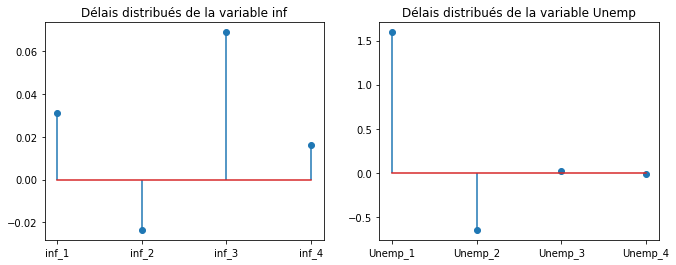

In [51]:
inf_coef = [results13.params[f"inf_{i}"] for i in range(1,5)]
inf_tick = [col for col in X13.columns if "inf" in col]
unemp_coef = [results13.params[f"Unemp_{i}"] for i in range(1,5)]
unemp_tick = [col for col in X13.columns if "Unemp" in col]

fig, axes = plt.subplots(1,2, figsize=(11,4))
axes[0].stem(inf_tick, inf_coef)
axes[0].set_xticklabels(inf_tick)
axes[0].set_title("Délais distribués de la variable inf")

axes[1].stem(unemp_tick, unemp_coef)
axes[1].set_xticklabels(unemp_tick)
axes[1].set_title("Délais distribués de la variable Unemp")

plt.show()

Pour le modèle,
$$
y_t = \beta_0 + \sum_{k=1}^{4} \beta_k y_{t-k} + \sum_{j=1}^{4}\alpha_j x_{t-j} + u_t
$$
le coéfficient long-terme de $x$ sur $y$ est : $$\theta = \frac{\sum_{j=1}^4 \alpha_j}{1 - \sum_{k=1}^4 \beta_k}$$

In [52]:
theta = np.sum(inf_coef) / (1- np.sum(unemp_coef))

print(f"Coéfficient long terme de l'inflation sur le chômage: {theta:.3f}")

Coéfficient long terme de l'inflation sur le chômage: 2.368
